<a href="https://colab.research.google.com/github/DrashtySoni/Python-for-Data-Science-Beginner-to-Advaced-/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression - Prediction of Explanatory Variable**
<hr/>

Submitted by: <br>
> Name: **Drashty Ranpara** <br>
Register Number: **21122018** <br>
Class: **2MSCDS** <br> 
<hr/>

## **Problem Statement -** 
To predict the income expense based on the training data

## **Variables**
> 1. *Training Data* - Independent Variable
> 2. *Income Expense* - Dependent Variable 

## **Import necessary libraries for Linear Regression -**

In [4]:
import numpy as np #math cal
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #plotting
import math # For SquareRoot

## **Read the data file -**

In [44]:
#Read the csv file

data = pd.read_csv("/content/sample_data/sampledata.csv")
data.head()

,TRAININGDATA,INCOMEEXPENSE
0,30,16
1,31,15
2,28,14
3,20,10
4,26,13


## **Choose the features to be used for prediction -**

In [6]:
data = data[["TRAININGDATA","INCOMEEXPENSE"]]
print(data.head())
type(data)

   TRAININGDATA  INCOMEEXPENSE
0            30             16
1            31             15
2            28             14
3            20             10
4            26             13


pandas.core.frame.DataFrame

## **Scatter Plot : TRAININGDATA VS INCOMEEXPENSE**

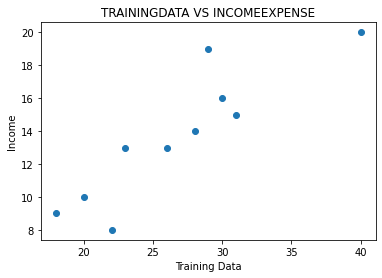

In [7]:
#Scatter Plot
#TRAININGDATA VS INCOMEEXPENSE :

plt.scatter(data["TRAININGDATA"],data["INCOMEEXPENSE"])
plt.title("TRAININGDATA VS INCOMEEXPENSE")
plt.xlabel("Training Data")
plt.ylabel("Income")
plt.show()

## **Split into Training(80%) and Testing(20%) data -**

In [8]:
#80% of the data for training and 20% for testing
number = int(len(data)*0.8)

#Training data:
traindata = data[:number]

#Testing data:
testdata = data[number:]

print ("Data Lenght: ",len(data))
print ("Training Data: ",len(traindata))
print ("Testing Data: ",len(testdata))

Data Lenght:  10
Training Data:  8
Testing Data:  2


## **Custom Linear Regression Function -**

In [9]:
#Function to find different co-eff.

def linear_regression(input,output):
    
    #Assignment of params
    Xi = input
    Yi = output
    
    #Total number of data
    n = len(Xi)
    
    #X Mean:
    Xi_mean = Xi.mean()
    
    #Y Mean:
    Yi_mean = Yi.mean()
    
    #∑ of X:
    Sum_Xi = (Xi).sum()
    
    #∑ of Y:
    Sum_Yi = (Yi).sum()
    
    #∑ of (X*Y) * n:
    Sum_XiYi = ((Xi*Yi).sum())*n
    
    #∑ of X*∑Y:
    Sum_Xi_Sum_Yi = Sum_Xi*Sum_Yi
    
    #∑(X*X) * n:
    Sum_XiXi = ((Xi*Xi).sum())*n
    
    #(∑X)2:
    Sum_Xi_Square = Sum_Xi*Sum_Xi
    
    #Slope(m):
    slope = (Sum_XiYi - Sum_Xi_Sum_Yi) / (Sum_XiXi-Sum_Xi_Square)
    
    #Intercept(b):
    intercept = Yi_mean - slope * Xi_mean
    
    return slope,intercept

## **Calculating Slope(β1) and Intercept(β0) in Y=β0 + β1X + ε**
> **Y**  = Dependent Variable

> **β0** = Intercept

> **β1** = Slope of line

> **X**  = Explanatory Variable(Independent Variable)

> **ε**  = Error/Residual Term

In [10]:
#Training with train data
#Finding co-eff of best fit line

real_slope,real_intercept = linear_regression(traindata["TRAININGDATA"],traindata["INCOMEEXPENSE"])

print ("Slope: " ,real_slope)
print ("Intercept: " ,real_intercept)

Slope:  0.4853801169590643
Intercept:  0.6447368421052637


## **Plot Training Data -**

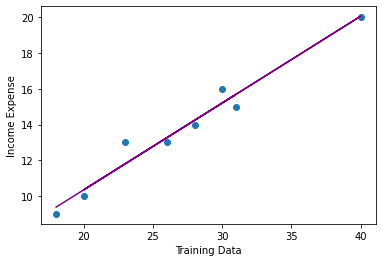

In [11]:
#Plot line with training data

plt.scatter(traindata["TRAININGDATA"],traindata["INCOMEEXPENSE"])
plt.plot(traindata["TRAININGDATA"],real_slope*traindata["TRAININGDATA"]+real_intercept,color="purple")  # Y=mX+B
plt.xlabel("Training Data")
plt.ylabel("Income Expense")
plt.show()

## **Predicting values-**

In [12]:
#Defining prediction function:

def fetch_regression_prediction(input,slope,intercept):
    pred_value = real_slope*input + real_intercept
    return pred_value

In [13]:
#Predicting values
my_training_data = 13

estimated_income = fetch_regression_prediction(my_training_data,real_slope,real_intercept)

print ("Estimated Income Expense: ",estimated_income)

Estimated Income Expense:  6.9546783625731


In [26]:
#Predicting values for whole data

y_prediction = fetch_regression_prediction(data["TRAININGDATA"],real_slope,real_intercept)
print(y_prediction)

0    15.206140
1    15.691520
2    14.235380
3    10.352339
4    13.264620
5    20.059942
6    11.808480
7     9.381579
8    11.323099
9    14.720760
Name: TRAININGDATA, dtype: float64


## **Plot Testing Data -**

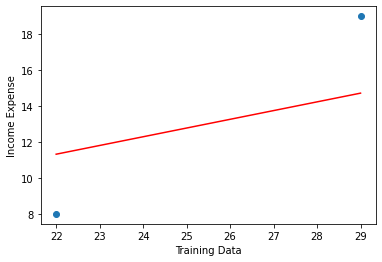

In [15]:
#Plot line for test data

plt.scatter(testdata["TRAININGDATA"],testdata["INCOMEEXPENSE"])
plt.plot(testdata["TRAININGDATA"],real_slope*testdata["TRAININGDATA"]+real_intercept,color="red")
plt.xlabel("Training Data")
plt.ylabel("Income Expense")
plt.show()

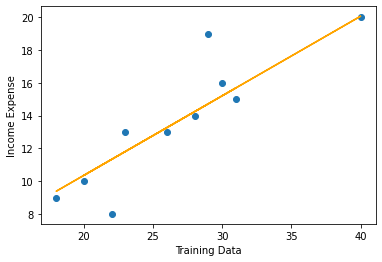

In [16]:
#Plot line for complete data (train + test)

plt.scatter(data["TRAININGDATA"],data["INCOMEEXPENSE"])
plt.plot(data["TRAININGDATA"],real_slope*data["TRAININGDATA"]+real_intercept,color="orange")
plt.xlabel("Training Data")
plt.ylabel("Income Expense")
plt.show()

## **Real vs Predicted Value**

In [17]:
#DataFrame for Actual and Predicted values:
real_pred_data = pd.DataFrame({"Real Value":data["INCOMEEXPENSE"] , "Predicted Value" :y_prediction})
real_pred_data.head(10)

,Real Value,Predicted Value
0,16,15.206140
1,15,15.691520
2,14,14.235380
3,10,10.352339
4,13,13.264620
5,20,20.059942
6,13,11.808480
7,9,9.381579
8,8,11.323099
9,19,14.720760


## **Errors/Residuals -**
> 1. Residual Sum of Squares *(RSS)*
> 2. Total Sum of Squares *(TSS)*
> 3. R Squared *(R2)*
> 4. Sum of Squared Error *(SSE)*
> 5. Root Mean Squared Error *(RMSE)*
> 6. Mean Absolute Error *(MAE)*


> **Regression sum of squares (RSS/SSR)**

> ![picture](https://timeseriesreasoning.files.wordpress.com/2021/06/5a1cd-1dyafin0cu1y68rvodalb5a.png)

>- The second term is the sum of squares due to regression, or SSR. It is the sum of the differences between the predicted value and the mean of the dependent variable. Think of it as a measure that describes how well our line fits the data.
>- If this value of SSR is equal to the sum of squares total, it means our regression model captures all the observed variability and is perfect. Once again, we have to mention that another common notation is ESS or explained sum of squares.

In [38]:
#Residual Sum of Squares (RSS):

def residual_sum_of_squares(input,output,slope,intercept):
    prediction = slope*input + intercept # y=mx+b

    
    res = (output - prediction)
     
    RSS = (res*res).sum() #∑ i = 1 to n (Yiactual − Yipredicted) 2
    
    return(RSS)

#Calculating Residual Sum of Squares

RSS = residual_sum_of_squares(testdata["TRAININGDATA"],testdata["INCOMEEXPENSE"],real_slope,real_intercept)
print ("Residual Sum of Squares(RSS) : ",RSS)

Residual Sum of Squares(RSS) :  29.354882698950114


> **Total sum of squares (TSS)**

> ![picture](https://timeseriesreasoning.files.wordpress.com/2021/06/f70e6-1gzsnbi_wkdfzkjhz9esx0g.png)

>- The sum of squares total, denoted SST, is the squared differences between the observed dependent variable and its mean. You can think of this as the dispersion of the observed variables around the mean – much like the variance in descriptive statistics.
>- It is a measure of the total variability of the dataset.

>- **Side note**: There is another notation for the SST. It is TSS or total sum of squares.

In [37]:
#Error calculation using Total Sum of Squares (TSS):

def total_sum_of_squares(output):
    Yi = output

    Yi_mean = Yi.mean()
    
    total_sum = (Yi - Yi_mean)
     
    TSS = (total_sum*total_sum).sum() #∑ i = 1 to n (Yiactual − Ymean) 2
    
    return(TSS)

#Calculating Total Sum of Squares

TSS = total_sum_of_squares(testdata["INCOMEEXPENSE"])
print ("Total Sum of Squares(TSS) : ",TSS)

Total Sum of Squares(TSS) :  60.5


> **R Squared (R2)**

> ![picture](https://editor.analyticsvidhya.com/uploads/22091R2%20Squared%20Formula.png)

>- If the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

>- Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

>- So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.

In [36]:
#R Squared

def r_squared(RSS,TSS):

    R_Sq = 1-(RSS/TSS) # 1-(RSS/TSS)
    
    return(R_Sq)

#Calculating R Squared error
R_Sq=r_squared(rss,tss)
print ("R Squared(R2) : ",R_Sq)

R Squared(R2) :  0.5147953272900807


> **Error Sum of Squares (SSE)**

> ![picture](https://www.datavedas.com/wp-content/uploads/2018/04/image001-1-300x105.png)

> SSE is the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0.

In [35]:
#Sum of Squared Error (SSE)

def sum_of_squared_error(RSS,TSS):

    SSE = TSS-RSS # SST=SSR+SSE / TSS=RSS+ESS / SSE=SST-SSR / ESS=TSS-RSS 
    
    return(SSE)

#Calculating Sum of Squared Error
SSE=sum_of_squared_error(rss,tss)
print ("Sum of Squared Error(SSE/ESS) : ",SSE)

Sum of Squared Error(SSE/ESS) :  31.145117301049886


> **Root Mean Squared Error(RMSE)**

> ![picture](https://editor.analyticsvidhya.com/uploads/34962RMSLE%20Formula.png)

> **Advantages of RMSE**
> - The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

>**Disadvantages of RMSE**
> - It is not that robust to outliers as compared to MAE.
for performing RMSE we have to NumPy NumPy square root function over MSE.

In [34]:
#Root Mean Squared Error (RMSE)

def root_mean_squared_error(RSS):
    n = len(data)
    mean_squared = RSS/n # Root(RSS/no. of data)
    RMSE = math.sqrt(mean_squared)  
    
    return(RMSE)

#Calculating Root Mean Squared Error
RMSE=root_mean_squared_error(rss)
print ("Root Mean Squared Error (RMSE) : ",RMSE)

Root Mean Squared Error (RMSE) :  3.1280922140579612


> **Mean Absolute Error(MAE)**

> ![picture](https://editor.analyticsvidhya.com/uploads/71890MAE%20Formula.png)

>**Advantages of MAE**
- The MAE you get is in the same unit as the output variable.
- It is most Robust to outliers.

>**Disadvantages of MAE**
- The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

In [30]:
#Mean Absolute Error (MAE)

def mean_absolute_error(RSS):
    n = len(data)
    mean_squared = RSS/n 
    MAE = abs(mean_squared)  # 1/n ∑ |Yiactual − Yipredicted|
    
    return(MAE)

#Calculating R Squared error
MAE=mean_absolute_error(rss)
print ("Mean Absolute Error(MAE) : ",MAE)

Mean Absolute Error(MAE) :  9.784960899650038


## **Correlation Matrics -**

In [24]:
corr_data=pd.DataFrame(data.corr()['INCOMEEXPENSE'])
corr_data

,INCOMEEXPENSE
TRAININGDATA,0.888125
INCOMEEXPENSE,1.000000


**Inference -** So, we can conclude by seeing Dataframe that TrainingData's correlation value is 0.888125 which is near to +1, shows positive relation w.r.t. IncomeExpense.

> ### Look at the **heatmap of the correlated data** to trigger our visual thinking

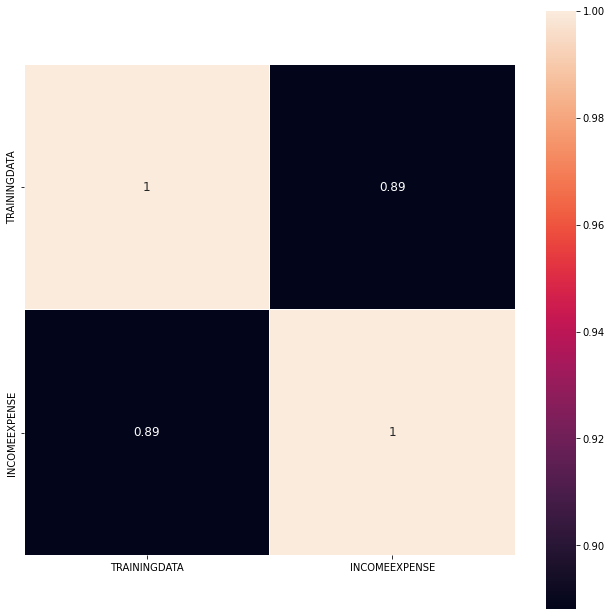

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data[corr_data.index].corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

**Inference -** So, we can conclude that Training Data shows positive relation w.r.t. IncomeExpense.

In [51]:
# initialize data of lists.
data = {'Independent Variable':['TRAININGDATA'],
        'Dependent Variable':['INCOMEEXPENSE'],
        'Residual Sum of Squares (RSS)':[RSS],
        'Total Sum of Squares (TSS)':[TSS],
        'R Squared (R2)':[R_Sq],
        'Sum of Squared Error (SSE)':[SSE],
        'Root Mean Squared Error (RMSE)':[RMSE],
        'Mean Absolute Error (MAE)':[MAE]}      
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
df.T

,0
Independent Variable,TRAININGDATA
Dependent Variable,INCOMEEXPENSE
Residual Sum of Squares (RSS),29.354883
Total Sum of Squares (TSS),60.5
R Squared (R2),0.514795
Sum of Squared Error (SSE),31.145117
Root Mean Squared Error (RMSE),3.128092
Mean Absolute Error (MAE),9.784961


## **Linear Regression in R to view *F score* and *p-value***
<img src='https://drive.google.com/uc?id=1y6xrWIig8TinW0_ZVxiytFPDaiuWtIRP'>


## **Conclusion -**
- We saw different error meethods and checked model accuracy in predicting explanatory variable along with model building and implementing simple linear regression in Python3.
- *Regression analysis* is all about determining how changes in the independent variables are associated with changes in the dependent variable. Coefficients tell you about these changes and p-values tell you if these coefficients are significantly different from zero.